In [31]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import keras
from keras import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import numpy as np
pd.__version__
np.__version__
pd.options.display.max_rows=15
white_wine = pd.read_csv('/gdrive/My Drive/wine with keras (1)/wine data/winequality-white.csv')
red_wine = pd.read_csv('/gdrive/My Drive/wine with keras (1)/wine data/winequality-red.csv')


In [33]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [34]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [0]:
from sklearn.model_selection import train_test_split

def generate_data(df,t_r):
  X = df.drop(['quality'],axis=1)
  Y = df['quality']
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = t_r)

  return X_train.values,Y_train,X_test.values,Y_test

In [0]:
###normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
red_wine_n = red_wine.copy()
red_wine_n [:11]=scaler.fit_transform(red_wine_n[:11])

In [0]:
####red_wine####
x_train_r,y_train_r,x_test_r,y_test_r = generate_data(red_wine_n,0.7)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow import keras
from keras.layers import LSTM, Dropout, Lambda, BatchNormalization
model_r = Sequential()

In [0]:
from keras.layers import Activation,Dense
model_r.add(Dense(32,input_shape=(11,)))
model_r.add(Activation('relu'))
##drop out
model_r.add(Dropout(0.5))
model_r.add(Dense(10))
model_r.add(Activation('softmax'))

In [0]:
from keras import optimizers

opt = keras.optimizers.Adam(learning_rate=0.05)
model_r.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=["accuracy"])

In [103]:
%%time
hist_r = model_r.fit(x_train_r,y_train_r,epochs=50,batch_size=512,validation_data=(x_test_r,y_test_r),verbose=2)

Train on 1119 samples, validate on 480 samples
Epoch 1/50
 - 0s - loss: 1.1496 - accuracy: 0.4450 - val_loss: 1.0656 - val_accuracy: 0.5437
Epoch 2/50
 - 0s - loss: 1.1494 - accuracy: 0.4888 - val_loss: 1.0573 - val_accuracy: 0.5542
Epoch 3/50
 - 0s - loss: 1.1283 - accuracy: 0.5139 - val_loss: 1.0645 - val_accuracy: 0.5479
Epoch 4/50
 - 0s - loss: 1.1239 - accuracy: 0.4987 - val_loss: 1.0656 - val_accuracy: 0.5833
Epoch 5/50
 - 0s - loss: 1.1353 - accuracy: 0.4951 - val_loss: 1.0787 - val_accuracy: 0.5479
Epoch 6/50
 - 0s - loss: 1.1474 - accuracy: 0.4692 - val_loss: 1.0754 - val_accuracy: 0.5667
Epoch 7/50
 - 0s - loss: 1.1224 - accuracy: 0.5219 - val_loss: 1.0724 - val_accuracy: 0.5292
Epoch 8/50
 - 0s - loss: 1.1173 - accuracy: 0.5049 - val_loss: 1.0231 - val_accuracy: 0.5854
Epoch 9/50
 - 0s - loss: 1.1383 - accuracy: 0.4870 - val_loss: 1.0889 - val_accuracy: 0.5250
Epoch 10/50
 - 0s - loss: 1.1428 - accuracy: 0.4683 - val_loss: 1.1103 - val_accuracy: 0.5667
Epoch 11/50
 - 0s - lo

In [104]:
test_loss, test_acc = model_r.evaluate(x_test_r,  y_test_r, verbose=2)
print(test_loss)
print(test_acc)

1.0937318046887716
0.6187499761581421


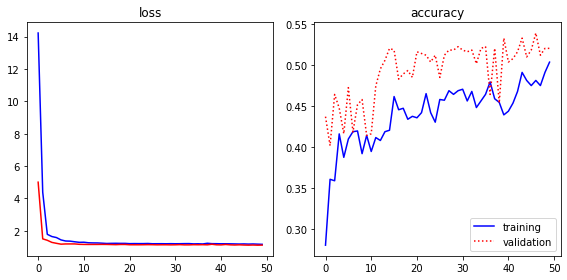

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_r.history['loss'],'b-',label="training")
plt.plot(hist_r.history['val_loss'],'r',label="validation")
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist_r.history['accuracy'], 'b-', label="training")
plt.plot(hist_r.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()


In [0]:
########white_wine################
x_train_w, y_train_w, x_test_w,y_test_w = generate_data(white_wine,0.7)
model_w = Sequential()
model_w.add(Dense(32,input_shape=(11,)))
model_w.add(Activation('relu'))
model_w.add(Dense(10))
model_w.add(Activation('softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model_w.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=["accuracy"])


In [0]:
%%time
hist_w = model_w.fit(x_train_w,y_train_w,epochs=100,batch_size=512,validation_data=(x_test_w,y_test_w),verbose=2)

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
 - 2s - loss: 36.8999 - accuracy: 0.0213 - val_loss: 4.3201 - val_accuracy: 0.4517
Epoch 2/100
 - 0s - loss: 4.4384 - accuracy: 0.4084 - val_loss: 3.2691 - val_accuracy: 0.4456
Epoch 3/100
 - 0s - loss: 4.1049 - accuracy: 0.3871 - val_loss: 4.2798 - val_accuracy: 0.3483
Epoch 4/100
 - 0s - loss: 4.0735 - accuracy: 0.3722 - val_loss: 3.9744 - val_accuracy: 0.3878
Epoch 5/100
 - 0s - loss: 3.5474 - accuracy: 0.4026 - val_loss: 3.5482 - val_accuracy: 0.4531
Epoch 6/100
 - 0s - loss: 3.1451 - accuracy: 0.4072 - val_loss: 3.0135 - val_accuracy: 0.4524
Epoch 7/100
 - 0s - loss: 2.6994 - accuracy: 0.4192 - val_loss: 2.5122 - val_accuracy: 0.4490
Epoch 8/100
 - 0s - loss: 2.2458 - accuracy: 0.4484 - val_loss: 2.0682 - val_accuracy: 0.3952
Epoch 9/100
 - 0s - loss: 1.8196 - accuracy: 0.4352 - val_loss: 1.5633 - val_accuracy: 0.4456
Epoch 10/100
 - 0s - loss: 1.4251 - accuracy: 0.4390 - val_loss: 1.3577 - val_accuracy: 0.4578
Epoch 11/1

In [0]:
test_loss, test_acc = model_w.evaluate(x_test_w,  y_test_w, verbose=2)
print(test_loss)
print(test_acc)

1.1191641783227726
0.5272108912467957


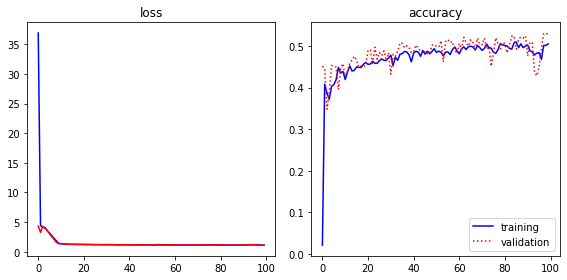

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_w.history['loss'],'b-',label="training")
plt.plot(hist_w.history['val_loss'],'r',label="validation")
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist_w.history['accuracy'], 'b-', label="training")
plt.plot(hist_w.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
#######white_wine+red_wine -> merge_wine############# 
merge_wine = pd.concat([red_wine,white_wine])
x_train_m,y_train_m,x_test_m,y_test_m = generate_data(merge_wine,0.7)
model_m = Sequential()
model_m.add(Dense(32,input_shape=(11,)))
model_m.add(Activation('relu'))
model_m.add(Dense(10))
model_m.add(Activation('softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model_m.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=["accuracy"])

In [0]:
%%time
hist_m = model_m.fit(x_train_m,y_train_m,epochs=250,batch_size=512,validation_data=(x_test_m,y_test_m),verbose=2)

Train on 4547 samples, validate on 1950 samples
Epoch 1/250
 - 0s - loss: 14.8717 - accuracy: 0.2032 - val_loss: 4.4051 - val_accuracy: 0.3410
Epoch 2/250
 - 0s - loss: 4.4634 - accuracy: 0.3701 - val_loss: 3.2256 - val_accuracy: 0.2738
Epoch 3/250
 - 0s - loss: 3.5103 - accuracy: 0.3970 - val_loss: 2.7125 - val_accuracy: 0.3051
Epoch 4/250
 - 0s - loss: 2.7583 - accuracy: 0.3890 - val_loss: 2.0245 - val_accuracy: 0.4026
Epoch 5/250
 - 0s - loss: 2.1851 - accuracy: 0.3932 - val_loss: 1.6440 - val_accuracy: 0.4359
Epoch 6/250
 - 0s - loss: 1.5623 - accuracy: 0.4146 - val_loss: 1.3349 - val_accuracy: 0.4195
Epoch 7/250
 - 0s - loss: 1.3594 - accuracy: 0.4537 - val_loss: 1.3098 - val_accuracy: 0.4574
Epoch 8/250
 - 0s - loss: 1.3082 - accuracy: 0.4361 - val_loss: 1.2305 - val_accuracy: 0.4379
Epoch 9/250
 - 0s - loss: 1.2715 - accuracy: 0.4550 - val_loss: 1.2268 - val_accuracy: 0.4574
Epoch 10/250
 - 0s - loss: 1.2643 - accuracy: 0.4440 - val_loss: 1.2354 - val_accuracy: 0.4559
Epoch 11/2

In [0]:
test_loss, test_acc = model_m.evaluate(x_test_m,  y_test_m, verbose=2)
print(test_loss)
print(test_acc)

1.1122087668149898
0.5210256576538086


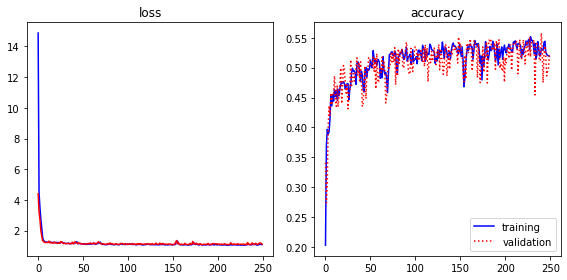

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_m.history['loss'],'b-',label="training")
plt.plot(hist_m.history['val_loss'],'r',label="validation")
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.plot(hist_m.history['accuracy'], 'b-', label="training")
plt.plot(hist_m.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()